In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### Importing the data and removing the categorical variables

In [26]:
cust_data = pd.read_csv("Data/customers.csv")

In [27]:
cust_data.head(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [28]:
cust_data.drop(['Region', 'Channel'], axis = 1, inplace= True)

In [29]:
cust_data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [30]:
display(cust_data.describe()) # To obtain summary statistics

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


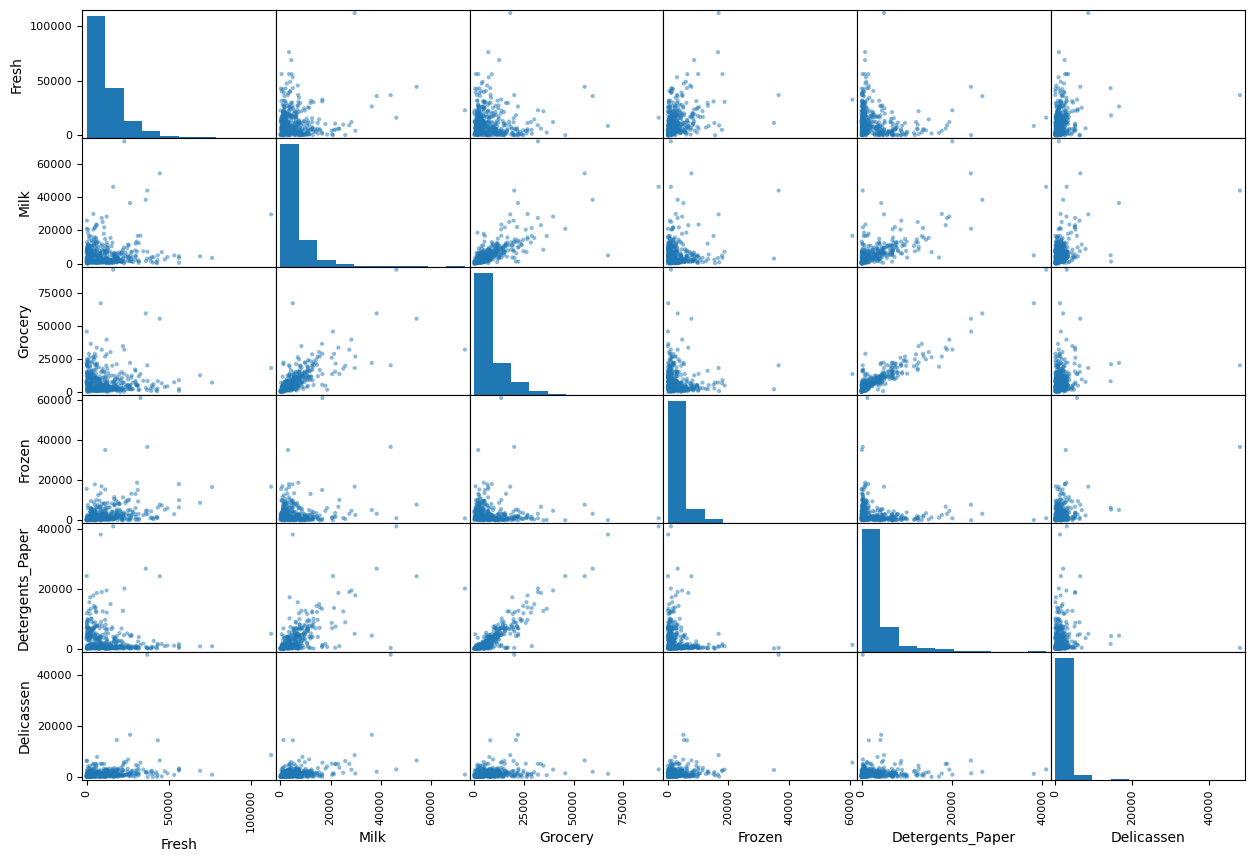

In [31]:
pd.plotting.scatter_matrix(cust_data, figsize =(15, 10))
plt.show()

### Since the data is skewed to the right, therefore a log transform is performed to overcome the skewness

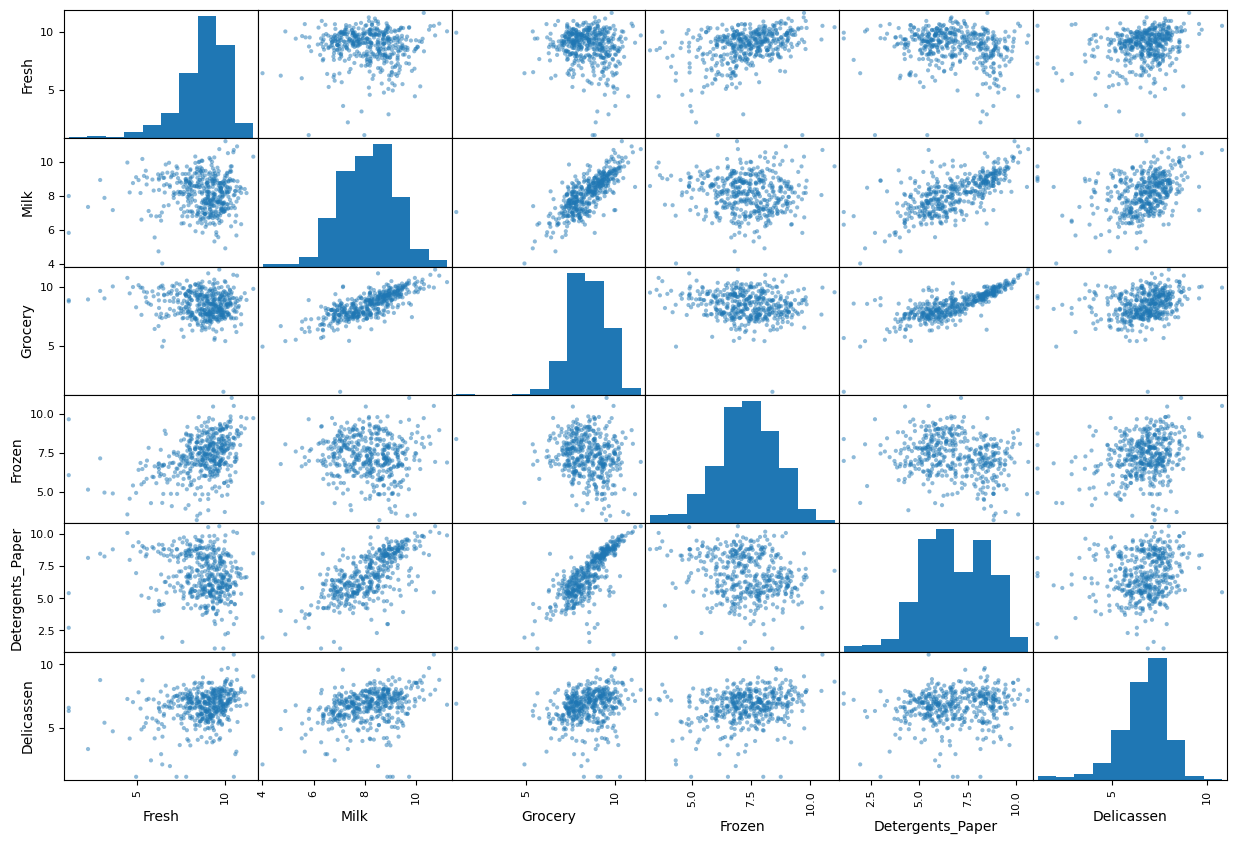

In [32]:
cust_data_trans = cust_data.apply(lambda x: np.log(x))
pd.plotting.scatter_matrix(cust_data_trans, figsize =(15, 10))
plt.show()

In [33]:
X = cust_data_trans.values

C:\Users\mail2\anaconda3\envs\scikitenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mail2\anaconda3\envs\scikitenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


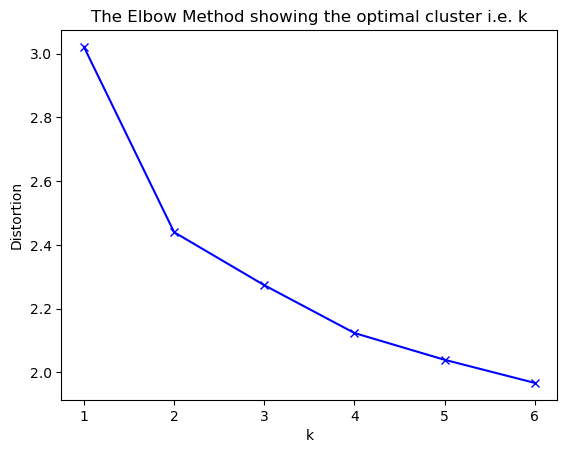

In [35]:
# K-means to dermine the number of clusters i.e K
distortions = []
K = range (1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis =1)) / X.shape[0])

# Plotting the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal cluster i.e. k')
plt.show()

## Based on the graph above we can either select k = 2 or k = 4

In [36]:
kmeans = KMeans(n_clusters= 2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

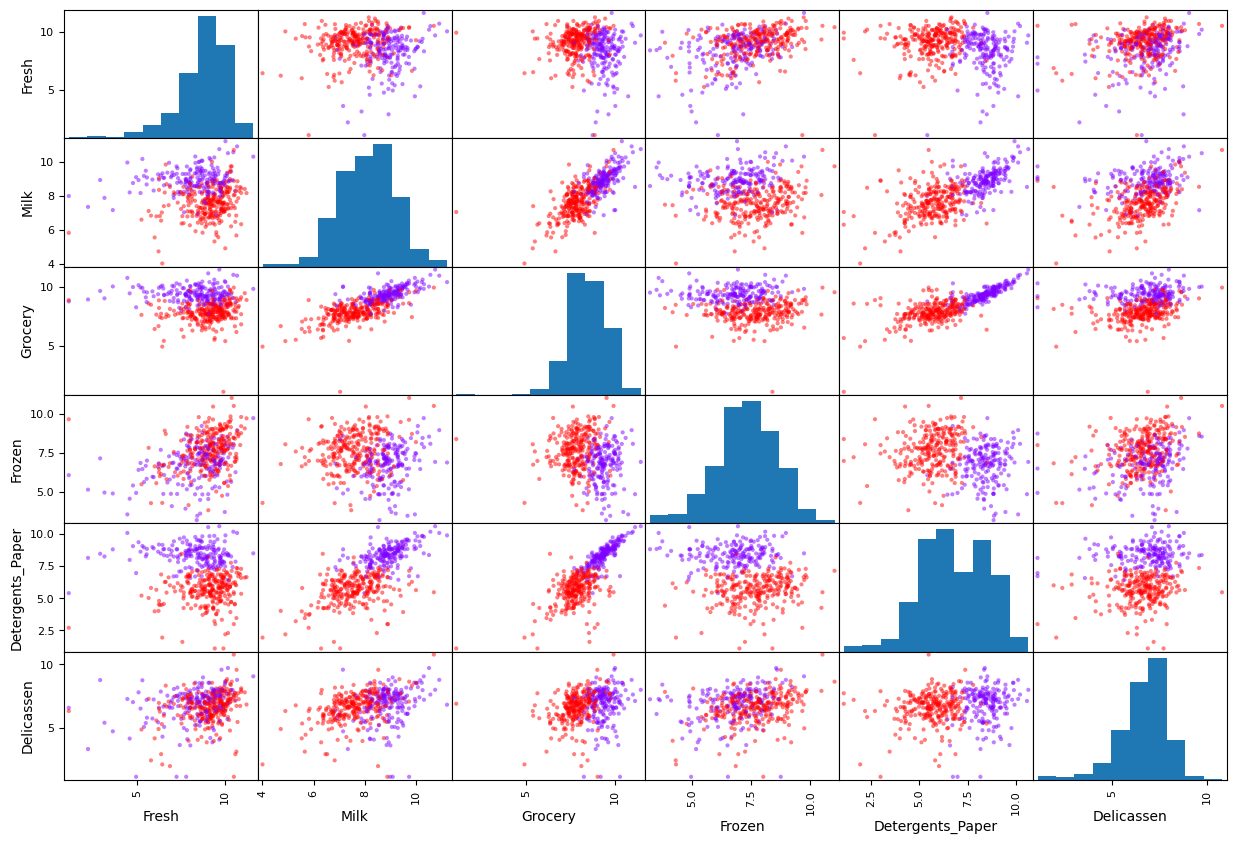

In [40]:
pd.plotting.scatter_matrix(cust_data_trans, figsize =(15, 10), c= kmeans.labels_, cmap='rainbow')
plt.show()

##### Reporting the values of the custer centers

In [42]:
centers = kmeans.cluster_centers_
centers = np.exp(kmeans.cluster_centers_)
centers = pd.DataFrame(centers, columns= cust_data.keys())
centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3868.721669,7487.802001,11905.075822,854.253907,4591.607846,913.918927
1,8621.366983,1913.554173,2381.683277,2186.819880,277.225348,704.493266


##### 1st cluster  has high spend in Milk, Grocery and Detergent, whereas 2nd cluster  has high spend in Frozen and Fresh 